Import Required Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Load data

In [2]:
# Load data
data = pd.read_csv("/kaggle/input/malicious-urls-dataset/malicious_phish.csv", nrows = 150000)

Data Preprocessing

In [3]:
# Preprocessing
# Convert types into numeric labels
label_mapping = {"benign": 0, "phishing": 1, "defacement": 2, "malware" : 3}
data['label'] = data['type'].map(label_mapping)

Feature Engineering

In [4]:
# Feature Engineering
# Tokenize URLs into words or characters
vectorizer = CountVectorizer(analyzer='char', lowercase=False)
X = vectorizer.fit_transform(data['url'])

# Split data into features (X) and labels (y)
y = data['label']

Split the Data

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [6]:
X[0]

<1x173 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [7]:
X[1]

<1x173 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [8]:
# An example of how the vectorizer would transform the give url
url1 = ['https://www.google.com/']
P = vectorizer.fit_transform(url1)
print(P)

  (0, 6)	1
  (0, 12)	2
  (0, 10)	1
  (0, 11)	1
  (0, 2)	1
  (0, 1)	3
  (0, 13)	3
  (0, 0)	2
  (0, 5)	2
  (0, 9)	3
  (0, 7)	1
  (0, 4)	1
  (0, 3)	1
  (0, 8)	1


In [9]:
type(P)

scipy.sparse._csr.csr_matrix

In [10]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (120000, 173)
Y_train Shape : (120000,)
X_test  Shape : (30000, 173)
Y_test  Shape : (30000,)


LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=24)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[21635    77   206    39]
 [  883   600   287    29]
 [  201    69  5248    15]
 [  143    41   160   367]]


KNeighborsClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(metric='euclidean')
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[21689    53   191    24]
 [  618  1005   170     6]
 [  177     8  5336    12]
 [   73    46    27   565]]


MultinomialNB

In [15]:
from sklearn.naive_bayes import MultinomialNB

classifier3 = MultinomialNB()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

In [16]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[19704   750  1074   429]
 [ 1148   386   244    21]
 [  677   526  4329     1]
 [  155   119   158   279]]


DecisionTreeClassifier 

In [17]:
from sklearn.tree import DecisionTreeClassifier 

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=22)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

In [18]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[21789    26   106    36]
 [   17  1550   137    95]
 [   72   120  5317    24]
 [   29    62    24   596]]


RandomForestClassifier

In [19]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators=100,max_features='sqrt')
classifier5.fit(X_train,y_train)
y_pred5 = classifier5.predict(X_test)

In [20]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[21929     2    26     0]
 [   35  1574   190     0]
 [   68     4  5461     0]
 [   49    71    24   567]]


XGBClassifier

In [21]:
from xgboost import XGBClassifier

# Assuming X_train and y_train are DataFrame objects
classifier6 = XGBClassifier(random_state=32)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)


In [22]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

[[21911     5    35     6]
 [    9  1675   109     6]
 [   33    18  5480     2]
 [   34    71    22   584]]


Performance mertics

In [23]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']

# Create a dictionary to map model names to their respective predictions
classifier_map = dict(zip(model_names, classifiers))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map.items():
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1score = f1_score(y_test, y_pred, average='weighted') 
    class_report = classification_report(y_test, y_pred)
    
    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'LogisticRegression':
Accuracy: 0.9283333333333333
Precision: 0.9216897094458811
Recall: 0.9283333333333333
F1-score: 0.9187180083055376
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     21957
           1       0.76      0.33      0.46      1799
           2       0.89      0.95      0.92      5533
           3       0.82      0.52      0.63       711

    accuracy                           0.93     30000
   macro avg       0.85      0.70      0.74     30000
weighted avg       0.92      0.93      0.92     30000


Metrics for Model 'KNeighborsClassifier':
Accuracy: 0.9531666666666667
Precision: 0.9519244601649969
Recall: 0.9531666666666667
F1-score: 0.9497961004109386
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21957
           1       0.90      0.56      0.69      1799
           2       0.93      0.96      0.9

Results on bar plot

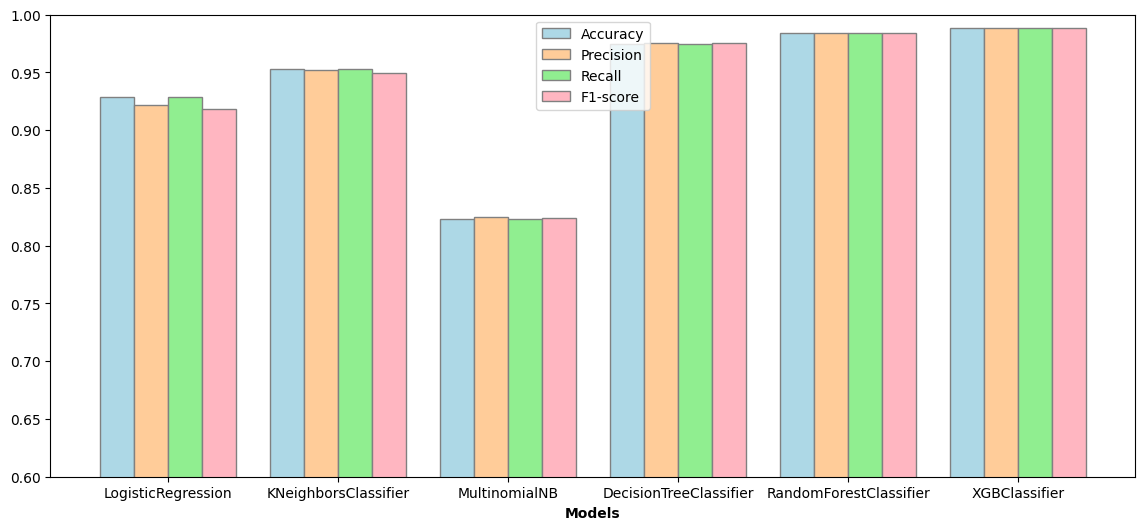

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize data for the bar chart
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(14, 6))

# Define light colors
colors = ['#add8e6', '#ffcc99', '#90ee90', '#ffb6c1']

# Plotting the bars
plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis limits
plt.ylim(0.6, 1.0)

# Add a legend and show the plot
plt.legend()
plt.show()


Results on line plot

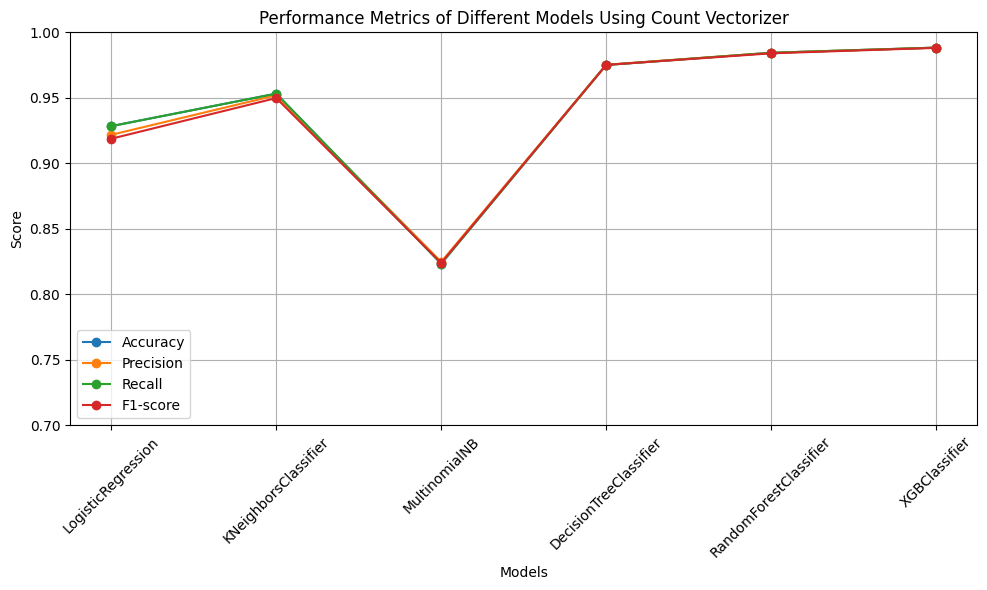

In [25]:
import matplotlib.pyplot as plt

# Initialize data for the line plot
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Plotting the line plot
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(models, metric_scores[metric], marker='o', label=metric)

plt.title('Performance Metrics of Different Models Using Count Vectorizer')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
